ML-decision tree

importing the libraries

In [22]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, auc
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


Loading the dataset

In [23]:
df = pd.read_csv("creditcard.csv")
print("Initial Dataset Shape:", df.shape)
print(df['Class'].value_counts())


Initial Dataset Shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


Feature Scaling

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

Data Spliting in decision tree:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

In [26]:
print("\nBefore Oversampling:")
print(y_train.value_counts())


Before Oversampling:
Class
0    199020
1       344
Name: count, dtype: int64


printing the dataset

In [27]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

CLASS IMBALANCE RATIOS

In [29]:
imbalance_ratio_before = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"\nImbalance Ratio (Before SMOTE): {imbalance_ratio_before:.2f} : 1")


Imbalance Ratio (Before SMOTE): 578.55 : 1


Apply Oversampling

In [30]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE Oversampling:")
print(y_train_res.value_counts())

imbalance_ratio_after = y_train_res.value_counts()[0] / y_train_res.value_counts()[1]
print(f"Imbalance Ratio (After SMOTE): {imbalance_ratio_after:.2f} : 1")


After SMOTE Oversampling:
Class
0    199020
1    199020
Name: count, dtype: int64
Imbalance Ratio (After SMOTE): 1.00 : 1


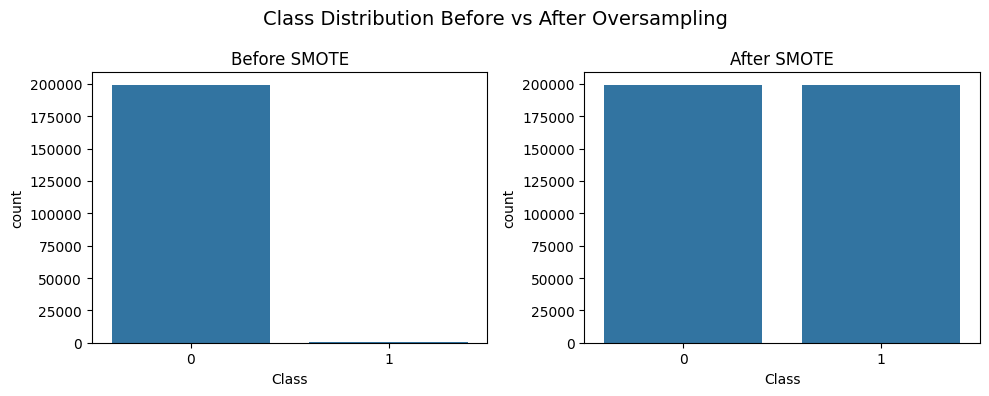

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before SMOTE")
sns.countplot(x=y_train_res, ax=ax[1])
ax[1].set_title("After SMOTE")
plt.suptitle("Class Distribution Before vs After Oversampling", fontsize=14)
plt.tight_layout()
plt.savefig("class_distribution_comparison.png", dpi=300)
plt.show()


saving the updated data

In [32]:
oversampled_data = pd.DataFrame(X_train_res)
oversampled_data['Class'] = y_train_res.values
oversampled_data.to_csv("oversampled_creditcard_data.csv", index=False)

IMporting the decesion tree calssifier and keeping the threashold, to 5 or else model got the overfiting

In [33]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_res, y_train_res)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Evaluation metrics

In [34]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy:  0.9702
Precision: 0.0469
Recall:    0.8378
F1 Score:  0.0888

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.84      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.90      0.54     85443
weighted avg       1.00      0.97      0.98     85443



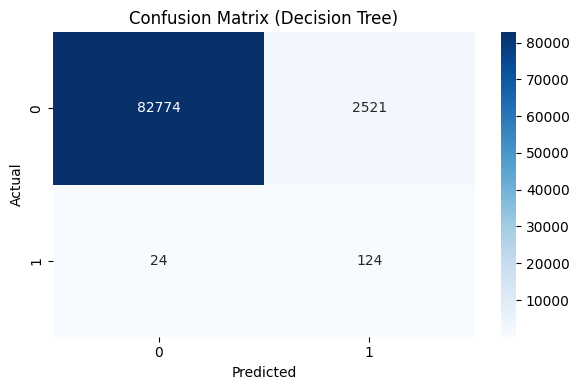

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

printing the precision recall curve

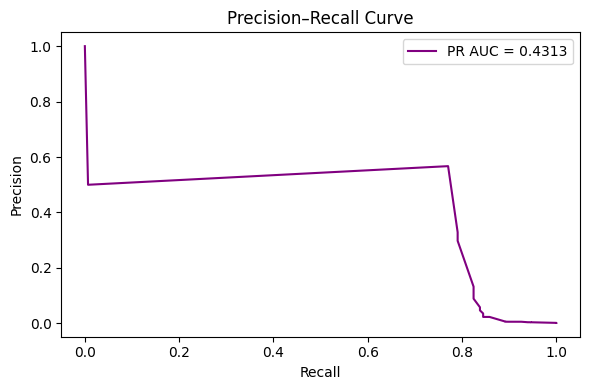

In [36]:
y_prob = clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='purple', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig("precision_recall_curve.png", dpi=300)
plt.show()


In [37]:
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(clf, f)

print("\n Model saved as 'decision_tree_model.pkl'")
print(" Graphs saved: 'class_distribution_comparison.png', 'confusion_matrix.png', 'precision_recall_curve.png'")


 Model saved as 'decision_tree_model.pkl'
 Graphs saved: 'class_distribution_comparison.png', 'confusion_matrix.png', 'precision_recall_curve.png'


printing the decision tree

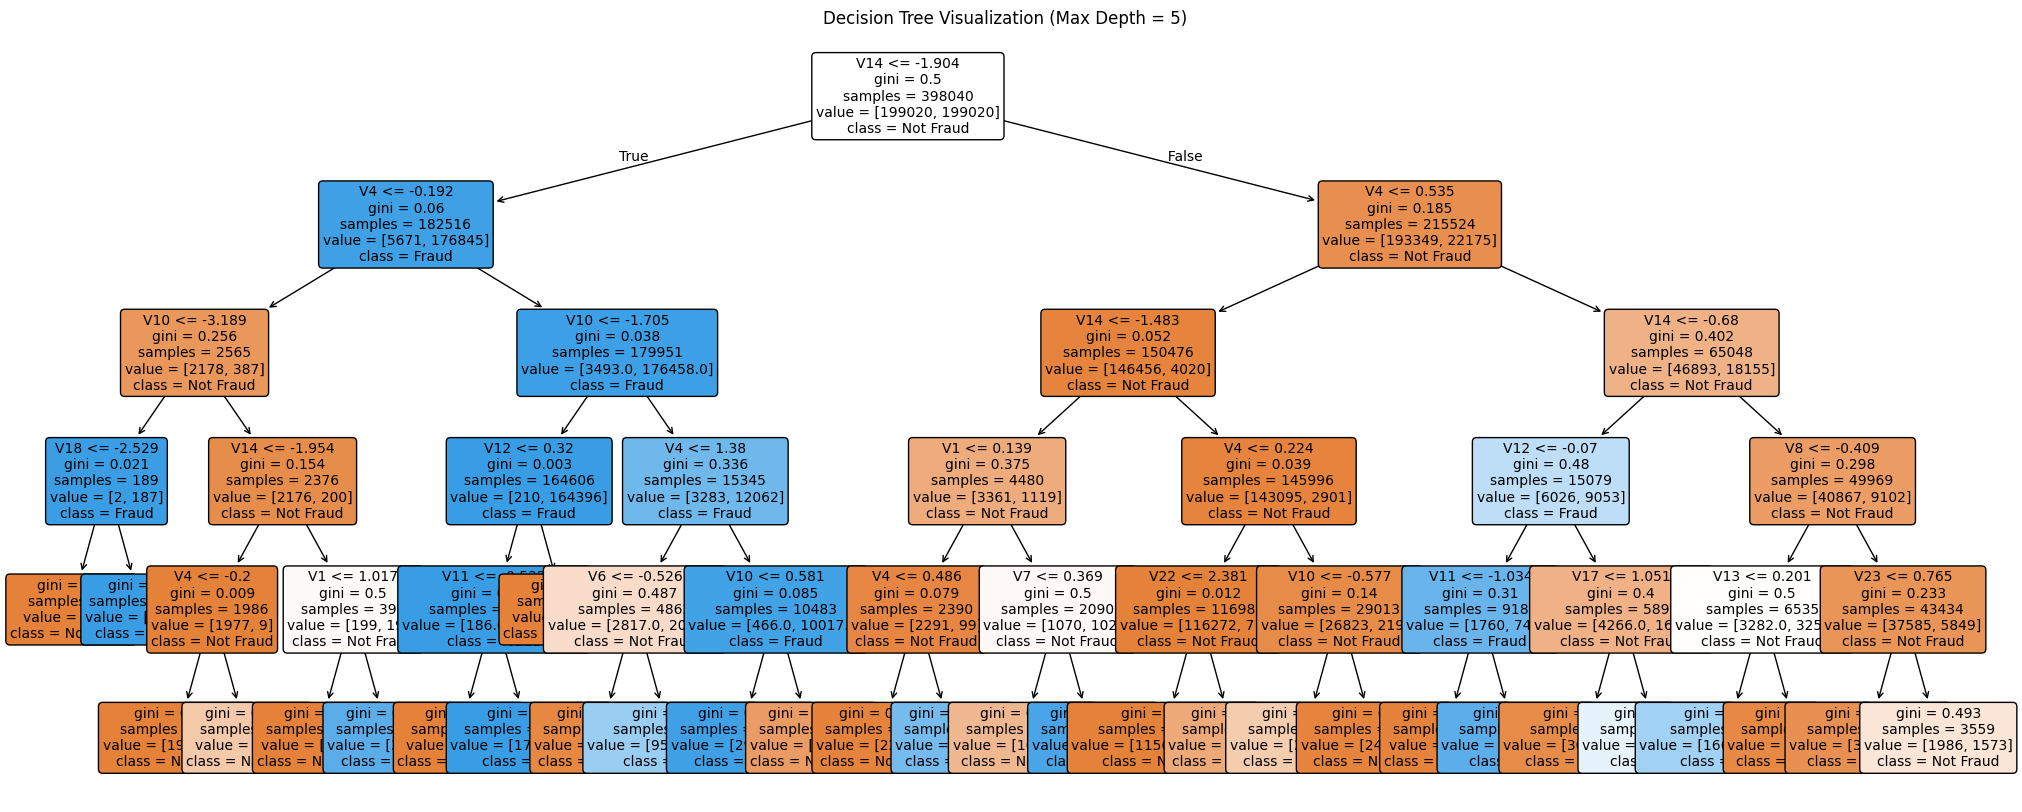

In [38]:
# Get feature names from the original dataframe (excluding the target 'Class')
feature_names = df.drop('Class', axis=1).columns.tolist()

# Set up the figure size
plt.figure(figsize=(25, 10))

# Plot the tree
plot_tree(clf, 
          feature_names=feature_names, 
          class_names=['Not Fraud', 'Fraud'], 
          filled=True, 
          rounded=True, 
          fontsize=10)

plt.title("Decision Tree Visualization (Max Depth = 5)")
plt.savefig("decision_tree_plot.png", dpi=300) # Save the plot as an image
plt.show()

In [39]:
X_train_res.shape

(398040, 30)